## 1. COLLECT DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2. DATA ANALYSIS

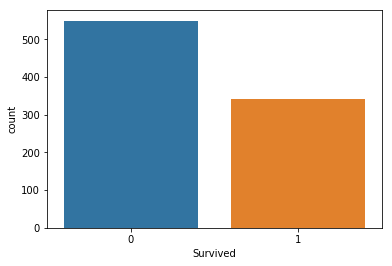

In [7]:
sns.countplot(x='Survived', data=titanic);  # 0- Not survived, 1- Survived

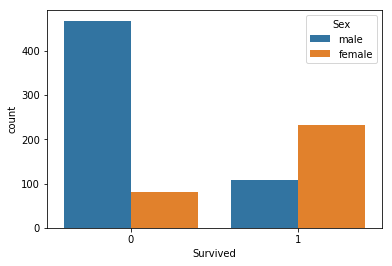

In [8]:
sns.countplot(x='Survived', hue='Sex', data=titanic); # Female survived more as compared to male.

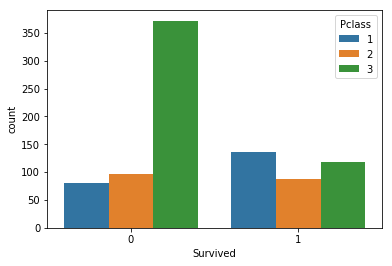

In [9]:
sns.countplot(x='Survived',hue='Pclass', data=titanic); # Third Class is having more no. of deaths

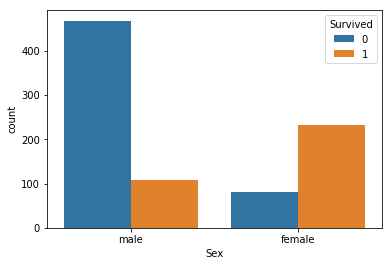

In [10]:
sns.countplot(hue='Survived', x='Sex', data=titanic); # Same as sns.countplot(x='Survived', hue='Sex', data=titanic);

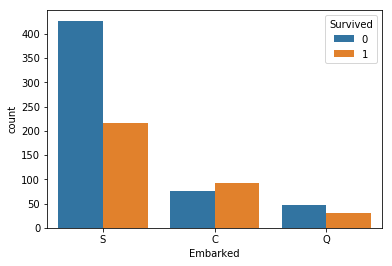

In [11]:
sns.countplot(hue='Survived', x='Embarked', data=titanic);

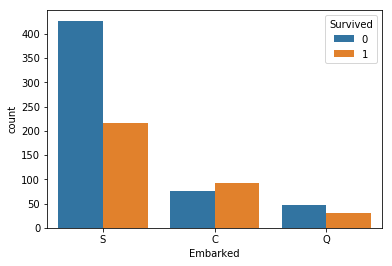

In [12]:
sns.countplot(hue='Survived', x='Embarked', data=titanic);

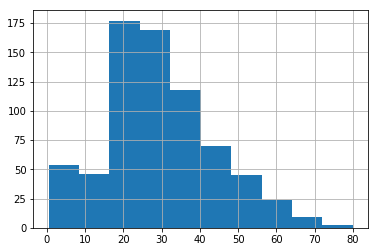

In [13]:
titanic.Age.hist();   # More passengers were from age between 18 to 40 

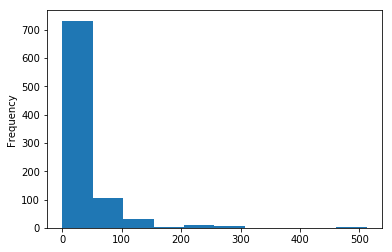

In [14]:
titanic.Fare.plot.hist();

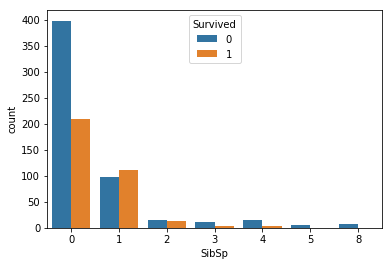

In [15]:
sns.countplot(x='SibSp',hue='Survived', data=titanic);

## 3. DATA WRANGLING

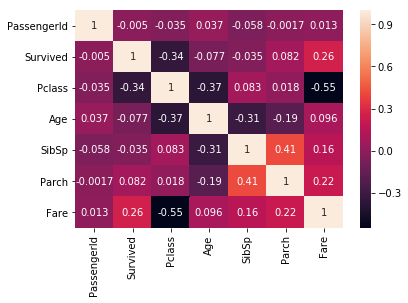

In [16]:
sns.heatmap(titanic.corr(),annot=True);  # We use heatmap to check correlation between continous variable with D.V

In [17]:
titanic = titanic.drop(['PassengerId','Cabin','Ticket','Name','Fare'],axis=1)

In [18]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [19]:
titanic.dropna(inplace=True)

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Embarked    712 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 44.5+ KB


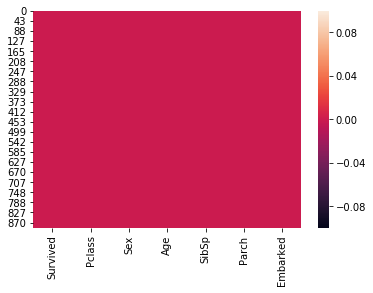

In [21]:
sns.heatmap(titanic.isnull());

In [22]:
titanic = pd.get_dummies(data=titanic,columns=['Pclass','Sex','Embarked'],drop_first=True)

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
Survived      712 non-null int64
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Pclass_2      712 non-null uint8
Pclass_3      712 non-null uint8
Sex_male      712 non-null uint8
Embarked_Q    712 non-null uint8
Embarked_S    712 non-null uint8
dtypes: float64(1), int64(3), uint8(5)
memory usage: 31.3 KB


In [24]:
titanic.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,1,1,0,1
1,1,38.0,1,0,0,0,0,0,0
2,1,26.0,0,0,0,1,0,0,1
3,1,35.0,1,0,0,0,0,0,1
4,0,35.0,0,0,0,1,1,0,1


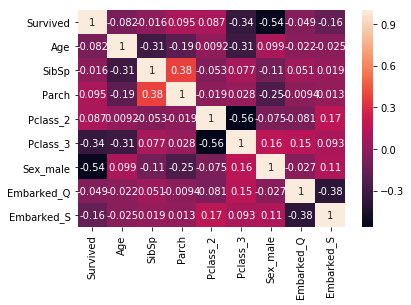

In [25]:
sns.heatmap(titanic.corr(),annot=True);

## 4. TRAIN DATA

In [26]:
y=titanic['Survived']

In [27]:
X = titanic.drop(['Survived'],axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [29]:
model_random = RandomForestClassifier()

In [30]:
model_random.fit(X_train, y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
model_random.feature_importances_ #Radom forest has the property that explain the importace of every independent variable

array([0.41873934, 0.07055585, 0.0502928 , 0.03147045, 0.13138011,
       0.26683441, 0.01135401, 0.01937304])

In [32]:
data = pd.Series(model_random.feature_importances_, index = X_train.columns)

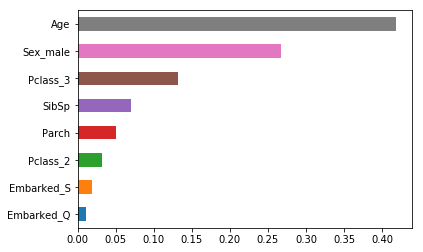

In [33]:
data.sort_values(ascending=True, inplace=True) #petal length is most important feature
data.plot.barh()

In [34]:
model_random.score(X_train, y_train)

0.9332161687170475

In [35]:
y_pred =model_random.predict(X_test)

In [36]:
model_random.classes_

array([0, 1])

In [37]:
confusion_matrix(y_test,y_pred)

array([[73,  8],
       [20, 42]])

In [38]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.90      0.84        81\n           1       0.84      0.68      0.75        62\n\n   micro avg       0.80      0.80      0.80       143\n   macro avg       0.81      0.79      0.79       143\nweighted avg       0.81      0.80      0.80       143\n'

# 5. ACCURACY CHECK

In [39]:
accuracy_score(y_test,y_pred)

0.8041958041958042